In [3]:
import pandas as pd

Microrregions
----------------

In [4]:
months = [9,10,11,12,1]
colunas = ['ano_mes','year','COCP_CampoM','COCP_Goioere','NCP_Apucarana','NCP_Astorga','NCP_Faxinal','NCP_Florai','NCP_Ivaipora', 
           'NCP_Londrina','NCP_Maringa','NCP_Porecatu','NP_Assai','NP_CornelioP','OP_Cascavel','OP_Foz','OP_Toledo']#'year','month',
criterio = 'month in months & columns in colunas & year > 2001 & year < 2014'
dados = pd.read_hdf('dados/banco_diss.h5', 'prec_mon_anomaly', where=criterio)

In [5]:
#dados = dados.set_index(['year','month'])
dados = dados.set_index(['ano_mes'], drop=False)

In [6]:
import matplotlib.pyplot as plt

In [7]:
t = dados['ano_mes']

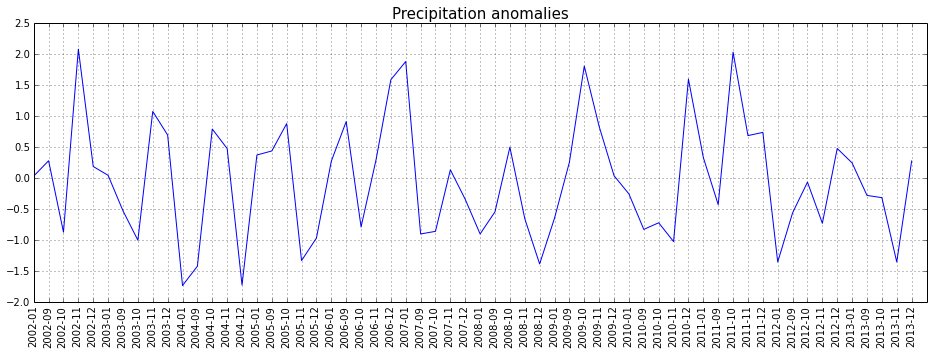

In [8]:
plt.figure(figsize=(16,5))
plt.title('Precipitation anomalies',fontsize=15)
plt.grid()
plt.plot(range(0,len(t)),dados['COCP_CampoM'])
plt.xticks(range(0,len(t)),t,rotation=90)
plt.show()

In [119]:
dados.columns

Index([u'ano_mes', u'year', u'COCP_CampoM', u'COCP_Goioere', u'NCP_Apucarana', u'NCP_Astorga', u'NCP_Faxinal', u'NCP_Florai', u'NCP_Ivaipora', u'NCP_Londrina', u'NCP_Maringa', u'NCP_Porecatu', u'NP_Assai', u'NP_CornelioP', u'OP_Cascavel', u'OP_Foz', u'OP_Toledo'], dtype='object')

In [9]:
dados2 = dados.drop('year',axis=1)
dados2 = dados2.set_index('ano_mes')

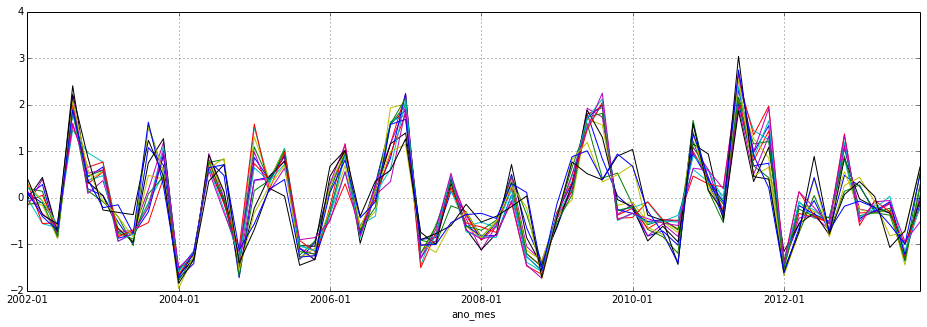

In [129]:
dados2.plot(legend=False,figsize=(16,5))

Mesorregions
------

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
months = [9,10,11,12,1]
colunas = ['ano_mes','year','month','COCP','NCP','NP','OP']#'year','month',
criterio = 'month in months & columns in colunas & year > 2001'# & year < 2014'

means = pd.read_hdf('dados/banco_diss.h5', 'prec/means', where=criterio)
#stdevs = pd.read_hdf('dados/banco_diss.h5','prec/stdevs', where=criterio)

In [12]:
means = means.drop(['year','month'],axis=1) #opcional
means = means.set_index('ano_mes')

In [13]:
means = means[1:]

In [14]:
t = means.index.tolist()

In [15]:
tt = []
for i in t:
    if i[5:] not in ['01','11']:
        i = ' '
        tt.append(i)
    else:
        tt.append(i)

In [16]:
tt

[' ',
 ' ',
 '2002-11',
 ' ',
 '2003-01',
 ' ',
 ' ',
 '2003-11',
 ' ',
 '2004-01',
 ' ',
 ' ',
 '2004-11',
 ' ',
 '2005-01',
 ' ',
 ' ',
 '2005-11',
 ' ',
 '2006-01',
 ' ',
 ' ',
 '2006-11',
 ' ',
 '2007-01',
 ' ',
 ' ',
 '2007-11',
 ' ',
 '2008-01',
 ' ',
 ' ',
 '2008-11',
 ' ',
 '2009-01',
 ' ',
 ' ',
 '2009-11',
 ' ',
 '2010-01',
 ' ',
 ' ',
 '2010-11',
 ' ',
 '2011-01',
 ' ',
 ' ',
 '2011-11',
 ' ',
 '2012-01',
 ' ',
 ' ',
 '2012-11',
 ' ',
 '2013-01',
 ' ',
 ' ',
 '2013-11',
 ' ',
 '2014-01']

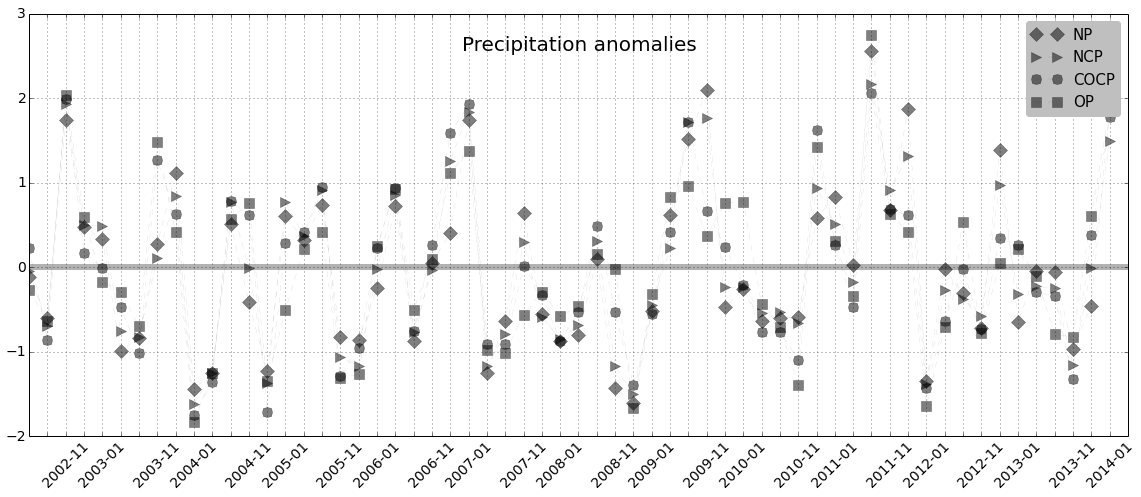

In [17]:
#matplotlib.rcParams['legend.frameon'] = 'True'
plt.figure(figsize=(16,7))
plt.title('Precipitation anomalies',fontsize=20,y=.9)
plt.grid()
a=range(0,len(t))#o v 8 s
plt.plot(a,means['NP'], color='k', alpha=.5, lw=.1, ms=10, dash_joinstyle='bevel',ls='--', marker='D', label= 'NP')
plt.plot(a,means['NCP'], color='k', alpha=.5, lw=.1, ms=10, dash_joinstyle='bevel', ls='--', marker='>', label= 'NCP')
plt.plot(a,means['COCP'], color='k', alpha=.5, lw=.1, ms=10,dash_joinstyle='bevel', ls='--', marker='o', label= 'COCP')
plt.plot(a,means['OP'], color='k', alpha=.5, lw=.1, ms=10,dash_joinstyle='bevel',ls='--', marker='s', label= 'OP')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(y=0, alpha=0.3, color='k',linewidth=6)


#Legendas com frescuras
leg = plt.legend(fancybox=True, fontsize=15)
frame = leg.get_frame()
frame.set_color('0.75')

plt.xticks(range(0,len(tt)),tt,rotation=45)
plt.tight_layout()
plt.savefig('/home/denis/SPIDEROAK/diss_artigo/figures/precipitation_anomalies.pdf')
#plt.show()